In [2]:
import eleanor
import lightkurve as lk 
from IPython.display import clear_output
import pandas as pd
import numpy as np
import pickle
from os import listdir
import warnings
import matplotlib.pyplot as plt
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [18]:
# Identify targets still needing to be observed
file_list = []
for files in listdir('E:/lightcurves/blazar/full/'):
    file_list.append(int(files[:-7]))   
total_targets = range(0,len(pd.read_csv('E:/catalogues/blazar_cat-4.csv', sep=',', header=0, usecols=['RA'],squeeze=True)))
target_list = [x for x in total_targets if x not in file_list]
print(target_list[:30])
print(len(target_list)/len(total_targets))

[6, 8, 12, 14, 16, 19, 23, 25, 28, 32, 37, 41, 43, 53, 54, 55, 57, 58, 59, 73, 75, 77, 78, 94, 98, 99, 100, 101, 116, 118]
0.2980225988700565


In [17]:
gaial = pd.read_csv('E:/catalogues/blazar_cat-4.csv', sep=',', header=0, usecols=['Gaia_Counterpart'],squeeze=True)
ral_counterpart = pd.read_csv('E:/catalogues/blazar_cat-4.csv', sep=',', header=0, usecols=['match_RA'],squeeze=True)
decl_counterpart = pd.read_csv('E:/catalogues/blazar_cat-4.csv', sep=',', header=0, usecols=['match_DEC'],squeeze=True)
terrible_targets = []
terrible_counterparts = []

for row in target_list:
    
    # Open try-except for blazars
    try:
        # Identify the target blazar
        star = eleanor.multi_sectors(sectors='all',tic=None,gaia=gaial[row][10:],tc=True)
        
        # Create empty LightCurve and place to store the median flux of each sector
        full_lc = lk.LightCurve([],[])
        medians = []
        
        # Loop through each sector
        for observation in star:
            
            # Download target data, select aperture, make light curve
            data = eleanor.TargetData(observation,bkg_size=15)
            data.custom_aperture(shape='rectangle', h=1,w=1, method='exact')
            data.get_lightcurve()
            
            # Convert to lightkurve, median normalize and append median
            lc = data.to_lightkurve(flux=data.corr_flux)
            medians.append(np.median(lc.flux))
            lc.flux = lc.flux - np.median(lc.flux)
            
            # Save sector light curve
            with open('E:/lightcurves/blazar/sector/{0}-{1}.pickle'.format(str(row),str(observation.sector)),'wb') as wfile:
                pickle.dump(lc,wfile)
                
            # Add sector light curve to full light curve
            full_lc = full_lc.append(lc)
        
        # Move all normalized light curves to the median of the median flux
        full_lc.flux = full_lc.flux + np.median(medians)
        
        # Save full light curve
        with open('E:/lightcurves/blazar/full/{}.pickle'.format(str(row)),'wb') as wfile:
            pickle.dump(full_lc,wfile)
        clear_output()
    except Exception as e:
        terrible_targets.append(row)
        clear_output()
        print(str(e))
    
    # Open try-except for counterpart stars
    try:
        # Identify the target star
        star = eleanor.multi_sectors(sectors='all',tic=None,coords=(ral_counterpart[row],decl_counterpart[row]),tc=True)
        
        # Create empty LightCurve and place to store the median flux of each sector
        full_lc = lk.LightCurve([],[])
        medians = []
        
        # Loop through each sector
        for observation in star:
            
            # Download target data, select aperture, make light curve
            data = eleanor.TargetData(observation,bkg_size=15)
            data.custom_aperture(shape='rectangle', h=1,w=1, method='exact')
            data.get_lightcurve()
            
            # Convert to lightkurve, median normalize and append median
            lc = data.to_lightkurve(flux=data.corr_flux)
            medians.append(np.median(lc.flux))
            lc.flux = lc.flux - np.median(lc.flux)
            
            # Save sector light curve
            with open('E:/lightcurves/star/sector/{0}-{1}.pickle'.format(str(row),str(observation.sector)),'wb') as wfile:
                pickle.dump(lc,wfile)
                
            # Add sector light curve to full light curve
            full_lc = full_lc.append(lc)
        
        # Move all normalized light curves to the median of the median flux
        full_lc.flux = full_lc.flux + np.median(medians)
        
        # Save full light curve
        with open('E:/lightcurves/star/full/{}.pickle'.format(str(row)),'wb') as wfile:
            pickle.dump(full_lc,wfile)
        clear_output()
    except Exception as e:
        terrible_counterparts.append(row)
        clear_output()
        print(str(e))

Your target is not observed by TESS, or maybe you need to run eleanor.Update()


In [11]:
'E:/lightcurves/star/full/{}.pickle'.format('a')

'E:/lightcurves/star/full/a.pickle'

In [12]:
from tess_stars2px import tess_stars2px_function_entry as tess_stars2px
result = tess_stars2px(8675309, ra, dec)
sector = result[3][result[3] < 21.5]
sectors = sector.tolist()
len(sectors)

0

In [3]:
#gaia = 1638133859936940288
#gaia = 2293842045955346176
#gaia = 2260127244173131520 #this one is good
#gaia = 1111278502434316672 #this one is brighter
#gaia = 931607032460399616
#gaia = 1111278502434316672 #this one is the absolute brightest
gaia = 1254715738511038976 #this one is bright and has an associated image
#gaia = 6741361533726507008 #cool object

star = eleanor.multi_sectors(sectors='all',tic=None ,gaia=gaia,tc=True)

full_lc = lk.LightCurve([],[])
data_objects = []
original_curve_objects = []
medians = []
for observation in star:
    data = eleanor.TargetData(observation,bkg_size=15)
    data.custom_aperture(shape='rectangle', h=1,w=1, method='exact')
    data.get_lightcurve()
    data_objects.append(data)

    lc = data.to_lightkurve(flux=data.corr_flux)
    original_curve_objects.append(lc)
    medians.append(np.median(lc.flux))
    lc.flux = lc.flux - np.median(lc.flux)
    full_lc = full_lc.append(lc)
full_lc.flux = full_lc.flux + np.median(medians)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Found star in Sector(s) 23
Inflating...


<AxesSubplot:xlabel='Time', ylabel='Flux'>

<Figure size 432x288 with 0 Axes>

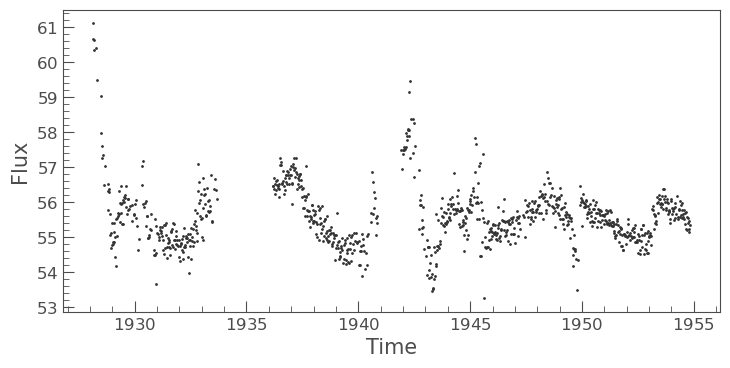

In [4]:
plt.figure()
full_lc.scatter(title='Gaia DR2 {}'.format(gaia))

(1660.0, 1690.0)

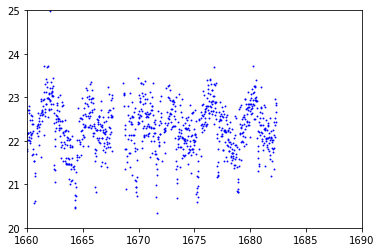

In [8]:
plt.scatter(full_lc.time,full_lc.flux,s=0.8,c='blue')
plt.ylim(20,25)
x = 1660
plt.xlim(x,x+30)

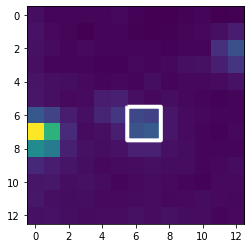

In [5]:
for data in data_objects[:1]:
    vis = eleanor.Visualize(data)
    vis.aperture_contour()
    #plt.imshow(data.tpf[0])

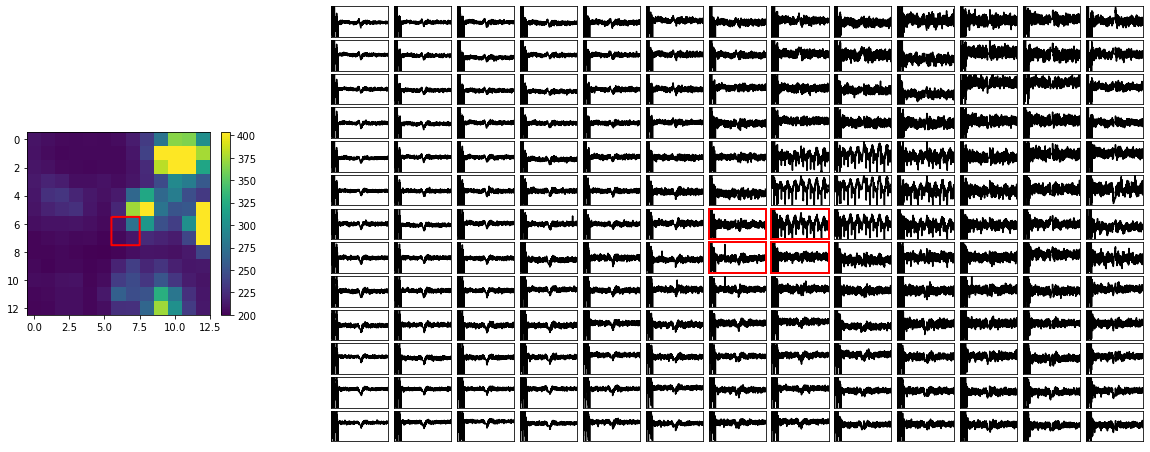

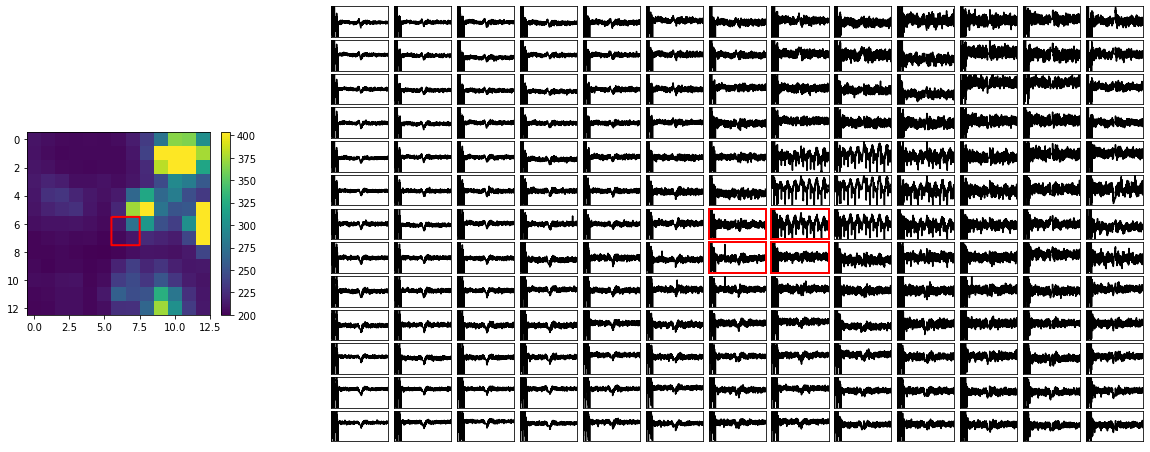

In [9]:
data = data_objects[0]
vis = eleanor.Visualize(data)
vis.pixel_by_pixel()

<AxesSubplot:title={'center':'TIC 114279734'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

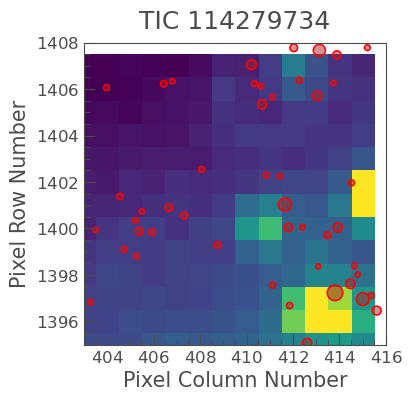

In [10]:
mag = 14.973
vis.plot_gaia_overlay(magnitude_limit=19)#mag+0.05)
#vis.plot_gaia_overlay(magnitude_limit=mag-0.05)

In [4]:
catalog_data = Catalogs.query_object("295.7150236 -35.2395776", radius = 3 * 0.00583, catalog="TIC").to_pandas()

In [5]:
catalog_data

,ID,ra,dec,pmRA,pmDEC,Tmag,objType,typeSrc,version,HIP,...,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,dstArcSec
0,114279734,295.715024,-35.239578,3.662510,-2.055140,17.6909,STAR,tmgaia2,20190415,NaN,...,NaN,4.768935,3.390677,295.715043,-35.239586,0.157540,0.124442,1,0,0.000126
1,114281118,295.711153,-35.239982,-11.476600,-18.216600,18.0263,STAR,tmgaia2,20190415,NaN,...,NaN,6.975219,5.068735,295.711093,-35.240061,0.235488,0.188059,1,0,11.472247
2,1925579310,295.721367,-35.236454,1.763220,-16.399500,19.8127,STAR,gaia2,20190415,NaN,...,NaN,19.235391,14.314074,295.721376,-35.236525,0.637327,0.542153,1,0,21.778442
3,1925579304,295.722477,-35.239325,-1.561480,-3.937150,19.0298,STAR,gaia2,20190415,NaN,...,NaN,12.275924,9.085322,295.722468,-35.239342,0.419605,0.339259,1,0,21.932903
4,114281113,295.709852,-35.243994,16.217000,17.327400,19.1367,STAR,tmgaia2,20190415,NaN,...,NaN,78.040511,74.370811,295.709937,-35.243919,0.515049,0.420805,1,0,22.000294
5,114281126,295.717139,-35.232561,-14.905400,-10.473600,18.7983,STAR,tmgaia2,20190415,NaN,...,NaN,59.242662,56.460547,295.717060,-35.232606,0.421911,0.339663,1,0,26.014502
6,1925579305,295.723738,-35.242776,-2.699190,-10.246900,20.3615,STAR,gaia2,20190415,NaN,...,NaN,50.351114,48.691241,295.723724,-35.242821,1.626828,2.073768,1,0,28.091582
7,114281124,295.707552,-35.233526,-1.817330,-6.333290,12.9883,STAR,tmgaia2,20190415,NaN,...,NaN,0.758021,0.469222,295.707542,-35.233553,0.021550,0.015290,0,0,30.941293
8,1925579303,295.703234,-35.243479,-0.827166,-8.482260,19.3548,STAR,gaia2,20190415,NaN,...,NaN,14.252400,10.765813,295.703230,-35.243516,0.494087,0.403736,1,0,37.400750
9,1925579302,295.706867,-35.249716,NaN,NaN,20.5764,STAR,gaia2,20190415,NaN,...,NaN,4.293814,1.944332,295.706867,-35.249716,4.293814,1.944332,-1,-1,43.672037
